In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import time

In [8]:
num_nodes = 10
max_x = 100
max_y = 100

G = nx.Graph()

nodes_list = {}
for i in range(num_nodes):
    G.add_node(i)
    nodes_list[i] = {
        'position': (random.uniform(0, max_x), random.uniform(0, max_y)),  # random (x, y) position
        'bandwidth': random.randint(1, 10),
        'mobility': random.random(),  # random value between 0 and 1
        'transmission_power': random.uniform(5, 20),  # random value between 5 and 20
        'packet_loss': random.uniform(0, 1),  # random value between 0 and 1
        'battery_capacity': random.uniform(10, 100),  # random value between 10 and 100
    }

for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if np.random.rand() < 0.5:
            G.add_edge(i, j)

In [9]:
import pandas as pd

# Create a DataFrame from the nodes_list dictionary
nodes_df = pd.DataFrame(nodes_list).T

# Reset the index and rename the index column to 'Node'
nodes_df.reset_index(inplace=True)
nodes_df.rename(columns={'index': 'Node'}, inplace=True)

# Display the DataFrame
nodes_df


,Node,position,bandwidth,mobility,transmission_power,packet_loss,battery_capacity
0,0,"(79.8270686079743, 22.449325262495)",3,0.73692,17.164634,0.889384,68.385569
1,1,"(35.568491305841754, 98.20803930356804)",3,0.852843,5.901512,0.888807,14.152718
2,2,"(23.07700834615032, 42.256638387309785)",8,0.464345,15.719907,0.988806,23.922292
3,3,"(87.68228142721696, 37.452824206487314)",1,0.982923,9.481884,0.505564,46.471591
4,4,"(21.529479289870046, 23.320235333892025)",4,0.424681,16.93042,0.740789,46.165507
5,5,"(43.3274238131634, 52.26228071257817)",9,0.293649,17.725526,0.13193,96.967373
6,6,"(4.318878018054928, 16.27403356966679)",6,0.536536,15.301396,0.466168,74.302679
7,7,"(92.62599578398647, 69.11207122860847)",6,0.238571,18.257938,0.87026,22.66935
8,8,"(65.45890085456772, 47.78891606275254)",10,0.579122,18.785688,0.464483,46.709262
9,9,"(86.5055475890276, 5.180330807083921)",10,0.331478,9.767925,0.159116,38.038625


In [10]:
nodes_df.to_csv('basic.csv')

In [11]:
df = pd.read_csv('basic.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

,Node,position,bandwidth,mobility,transmission_power,packet_loss,battery_capacity
0,0,"(79.8270686079743, 22.449325262495)",3,0.736920,17.164634,0.889384,68.385569
1,1,"(35.568491305841754, 98.20803930356804)",3,0.852843,5.901512,0.888807,14.152718
2,2,"(23.07700834615032, 42.256638387309785)",8,0.464345,15.719907,0.988806,23.922292
3,3,"(87.68228142721696, 37.452824206487314)",1,0.982923,9.481884,0.505564,46.471591
4,4,"(21.529479289870046, 23.320235333892025)",4,0.424681,16.930420,0.740789,46.165507
5,5,"(43.3274238131634, 52.26228071257817)",9,0.293649,17.725526,0.131930,96.967373
6,6,"(4.318878018054928, 16.27403356966679)",6,0.536536,15.301396,0.466168,74.302679
7,7,"(92.62599578398647, 69.11207122860847)",6,0.238571,18.257938,0.870260,22.669350
8,8,"(65.45890085456772, 47.78891606275254)",10,0.579122,18.785688,0.464483,46.709262
9,9,"(86.5055475890276, 5.180330807083921)",10,0.331478,9.767925,0.159116,38.038625


# Bellman Ford

In [39]:
def bellman_ford(source, destination, G, nodes_df):
    if source == destination:
        return [source]

    dist = {node: float('inf') for node in nodes_df['Node']}
    dist[source] = 0
    prev = {node: None for node in nodes_df['Node']}

    # Step 2: Relax edges repeatedly
    for i in range(len(nodes_df) - 1):
        for edge in G.edges():
            u, v = edge
            if dist[u] + (1 / nodes_df.loc[v]['bandwidth']) < dist[v]:
                dist[v] = dist[u] + (1 / nodes_df.loc[v]['bandwidth'])
                prev[v] = u

    # Step 3: Check for negative-weight cycles
    for edge in G.edges():
        u, v = edge
        if dist[u] + (1 / nodes_df.loc[v]['bandwidth']) < dist[v]:
            raise ValueError("Negative weight cycle detected")

    # Step 4: Construct the shortest path from source to destination
    path = [destination]
    node = destination
    while prev[node] is not None:
        path.insert(0, prev[node])
        node = prev[node]

    return path

In [40]:
source_node = 2
destination_node = 9
path = bellman_ford(source_node, destination_node, G, df)
print("Path:", path)

Path: [2, 7, 9]


In [41]:
def draw_network_graph(G, path, nodes_df):
    # Create a layout for the network graph
    pos = nx.spring_layout(G)
    
    # Draw the network graph with labels
    nx.draw(G, pos, with_labels=True)
    
    # Highlight the path taken by the routing function
    path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth
    labels = {i: f"{i} ({nodes_df.loc[i]['bandwidth']} Mbps)" for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path and bandwidth
    plt.show()

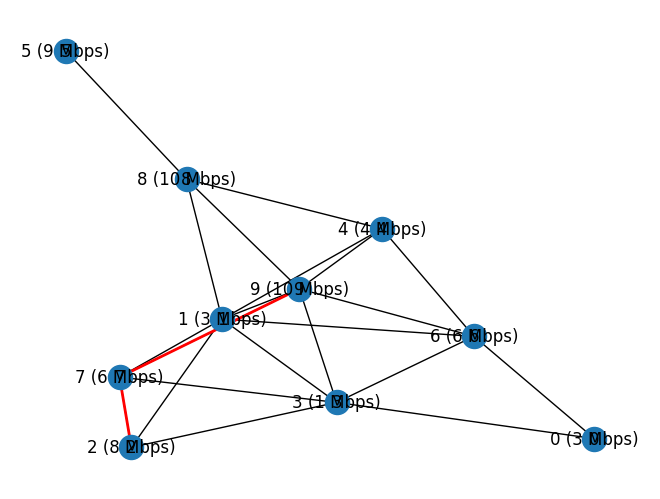

In [42]:
draw_network_graph(G, path, df)

In [43]:
import pandas as pd

# Initialize an empty list to store the rows of the DataFrame
data = []

# Iterate over the path
for i in range(len(path) - 1):
    # Get the nodes at the current and next position in the path
    node_a = path[i]
    node_b = path[i+1]

    # Get the bandwidth of the edge from node_a to node_b
    bandwidth = nodes_list[node_b]['bandwidth']

    # Append the row to the data
    data.append([node_a, node_b, bandwidth])

# Create the DataFrame
df1 = pd.DataFrame(data, columns=['node_a', 'node_b', 'bandwidth'])

df1


,node_a,node_b,bandwidth
0,2,7,6
1,7,9,10


In [44]:
import pandas as pd

def calculate_avg_health(G, path, nodes_df):
    data_list = []
    total_health = 0
    num_edges = 0

    # Initializing all variables to 0
    bandwidth = 0

    for i in range(len(path) - 1):
        node_a, node_b = path[i], path[i + 1]

        if G.has_edge(node_a, node_b):
            bandwidth = min(nodes_df.loc[node_a]['bandwidth'], nodes_df.loc[node_b]['bandwidth'])

            health = bandwidth*10
            total_health += health
            num_edges += 1

            # Creating a dictionary of variables and values for the current node pair
            data = {
                "node_a": node_a,
                "node_b": node_b,
                "bandwidth": bandwidth,
                "health": health,
            }

            # Adding the dictionary to the list
            data_list.append(data)

    average_health = total_health / num_edges if num_edges > 0 else 0
    print("avg health of transfer " + str(average_health))

    # Converting the list of dictionaries into a DataFrame
    dfh1 = pd.DataFrame(data_list)
    return dfh1


In [45]:
dfh1 = calculate_avg_health(G, path, df)
dfh1 

avg health of transfer 60.0


,node_a,node_b,bandwidth,health
0,2,7,6,60
1,7,9,6,60


# Dijkstra Algo


In [32]:
def dijkstra_shortest_path(source, destination, G, nodes_df):
    # Create a new graph with edge weights as the inverse of bandwidth
    G_weighted = G.copy()
    for u, v in G.edges():
        G_weighted[u][v]['weight'] = 1 / nodes_df.loc[u]['bandwidth']

    # Apply Dijkstra's algorithm on the weighted graph
    path = nx.dijkstra_path(G_weighted, source, destination, weight='weight')
    return path


In [33]:
source = 2
destination = 9
path = dijkstra_shortest_path(source_node, destination_node, G, df)
print(f"Path: {path}")

Path: [2, 7, 9]


In [34]:
def draw_network_graph(G, path, nodes_df):
    # Create a layout for the network graph
    pos = nx.spring_layout(G)
    
    # Draw the network graph with labels
    nx.draw(G, pos, with_labels=True)
    
    # Highlight the path taken by the routing function
    path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth from the DataFrame
    labels = {i: f"{i} ({nodes_df.loc[i]['bandwidth']} Mbps)" for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path and bandwidth
    plt.show()

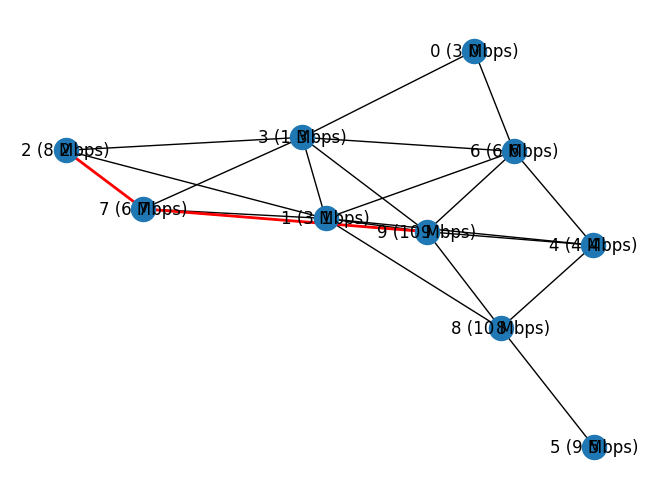

In [35]:
draw_network_graph(G, path, df)

In [36]:
import pandas as pd

# Initialize an empty list to store the rows of the DataFrame
data = []

# Iterate over the path
for i in range(len(path) - 1):
    # Get the nodes at the current and next position in the path
    node_a = path[i]
    node_b = path[i+1]

    # Get the bandwidth of the edge from node_a to node_b
    bandwidth = nodes_list[node_b]['bandwidth']

    # Append the row to the data
    data.append([node_a, node_b, bandwidth])

# Create the DataFrame
df2 = pd.DataFrame(data, columns=['node_a', 'node_b', 'bandwidth'])
df2


,node_a,node_b,bandwidth
0,2,7,6
1,7,9,10


In [37]:
import pandas as pd

def calculate_avg_health(G, path, nodes_df):
    data_list = []
    total_health = 0
    num_edges = 0

    # Initializing all variables to 0
    bandwidth = 0

    for i in range(len(path) - 1):
        node_a, node_b = path[i], path[i + 1]

        if G.has_edge(node_a, node_b):
            bandwidth = min(nodes_df.loc[node_a]['bandwidth'], nodes_df.loc[node_b]['bandwidth'])

            health = bandwidth*10
            total_health += health
            num_edges += 1

            # Creating a dictionary of variables and values for the current node pair
            data = {
                "node_a": node_a,
                "node_b": node_b,
                "bandwidth": bandwidth,
                "health": health,
            }

            # Adding the dictionary to the list
            data_list.append(data)

    average_health = total_health / num_edges if num_edges > 0 else 0
    print("avg health of transfer " + str(average_health))

    # Converting the list of dictionaries into a DataFrame
    dfh2 = pd.DataFrame(data_list)
    return dfh2


In [38]:
dfh2 = calculate_avg_health(G, path, df)
dfh2 

avg health of transfer 60.0


,node_a,node_b,bandwidth,health
0,2,7,6,60
1,7,9,6,60


# Genetic Algo

In [22]:
def genetic_algorithm_dijkstra_shortest_path(source, destination, G, nodes_df):
    population_size = 50
    num_generations = 100
    mutation_probability = 0.1

    def generate_individual():
        return [random.randint(0, len(nodes_df) - 1) for _ in range(random.randint(1, len(nodes_df) - 1))]

    def calculate_fitness(individual):
        fitness = 0
        for i in range(len(individual) - 1):
            start_node = individual[i]
            end_node = individual[i + 1]
            fitness += 1 / nodes_df.loc[start_node]['bandwidth']  # Use bandwidth as a fitness metric
            fitness += nx.shortest_path_length(G, start_node, end_node, weight='weight')
        fitness += 1 / nodes_df.loc[individual[-1]]['bandwidth']
        return fitness

    def selection(population):
        fitnesses = [calculate_fitness(individual) for individual in population]
        total_fitness = sum(fitnesses)
        probabilities = [fitness / total_fitness for fitness in fitnesses]
        indices = np.random.choice(range(len(population)), size=len(population), p=probabilities)
        return [population[index] for index in indices]

    def crossover(parent1, parent2):
        crossover_point = random.randint(1, min(len(parent1), len(parent2)) - 1)
        child1 = parent1[:crossover_point] + parent2[crossover_point:]
        child2 = parent2[:crossover_point] + parent1[crossover_point:]
        return child1, child2

    def mutation(individual):
        if random.random() < mutation_probability:
            index1 = random.randint(0, len(individual) - 1)
            index2 = random.randint(0, len(nodes_df) - 1)
            individual[index1] = index2

    population = [generate_individual() for _ in range(population_size)]
    for generation in range(num_generations):
        population = selection(population)
        new_population = []
        while len(new_population) < population_size:
            parent1 = random.choice(population)
            parent2 = random.choice(population)
            child1, child2 = crossover(parent1, parent2)
            mutation(child1)
            mutation(child2)
            new_population.append(child1)
            if len(new_population) < population_size:
                new_population.append(child2)
        population = new_population

    best_individual = min(population, key=calculate_fitness)
    best_path = [source] + best_individual + [destination]
    return best_path


In [23]:
source = 2
destination = 9
path = genetic_algorithm_dijkstra_shortest_path(source, destination, G, df)
print(f"Path: {path}")

Path: [2, 9, 0, 2, 5, 0, 5, 3, 3, 3, 9]


In [24]:
def draw_network_graph(G, path, nodes_df):
    # Create a layout for the network graph
    pos = nx.spring_layout(G)
    
    # Draw the network graph with labels
    nx.draw(G, pos, with_labels=True)
    
    # Highlight the path taken by the routing function
    path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)
    
    # Draw node labels with their bandwidth from the DataFrame
    labels = {i: f"{i} ({nodes_df.loc[i]['bandwidth']} Mbps)" for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels)
    
    # Show the network graph with the path and bandwidth
    plt.show()

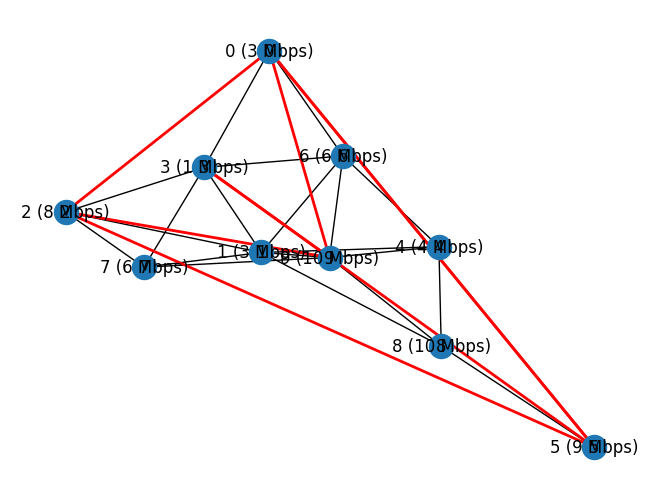

In [25]:
draw_network_graph(G, path, df)

In [34]:
import pandas as pd

# Initialize an empty list to store the rows of the DataFrame
data = []

# Iterate over the path
for i in range(len(path) - 1):
    # Get the nodes at the current and next position in the path
    node_a = path[i]
    node_b = path[i+1]

    # Get the bandwidth of the edge from node_a to node_b
    bandwidth = nodes_list[node_b]['bandwidth']

    # Append the row to the data
    data.append([node_a, node_b, bandwidth])

# Create the DataFrame
df3 = pd.DataFrame(data, columns=['node_a', 'node_b', 'bandwidth'])
df3


,node_a,node_b,bandwidth
0,2,9,4
1,9,9,4
2,9,6,10
3,6,3,1
4,3,4,4
5,4,9,4
6,9,4,4
7,4,5,2
8,5,0,3
9,0,9,4
